In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Loading data

In [235]:
from datasets import get_dataset_split_names,load_dataset

path="Bena345/cdc-diabetes-health-indicators"

# To get how they split the data
split_names=get_dataset_split_names(path)
# Number train and test dataset
train_size=10000
test_size=5000

diabetes=load_dataset(path,split=[f'{split_names[0]}[:{train_size}]', f'{split_names[1]}[:{train_size}]'])
diabetes


[Dataset({
     features: ['ID', 'BMI', 'PhysHlth', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes_binary'],
     num_rows: 10000
 }),
 Dataset({
     features: ['ID', 'BMI', 'PhysHlth', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes_binary'],
     num_rows: 10000
 })]

### splitting data

In [236]:
diabetes_train_dataframe=diabetes[0].to_pandas()
diabetes_test_dataframe=diabetes[1].to_pandas()

In [237]:
diabetes_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10000 non-null  int64  
 1   BMI                   10000 non-null  float32
 2   PhysHlth              10000 non-null  float32
 3   Age                   10000 non-null  object 
 4   HighBP                10000 non-null  object 
 5   HighChol              10000 non-null  object 
 6   CholCheck             10000 non-null  object 
 7   Smoker                10000 non-null  object 
 8   Stroke                10000 non-null  object 
 9   HeartDiseaseorAttack  10000 non-null  object 
 10  PhysActivity          10000 non-null  object 
 11  Fruits                10000 non-null  object 
 12  Veggies               10000 non-null  object 
 13  HvyAlcoholConsump     10000 non-null  object 
 14  AnyHealthcare         10000 non-null  object 
 15  NoDocbcCost         

In [238]:
diabetes_train_dataframe.head(5)

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary
0,114414,29.0,0.0,65 to 69,0,1,1,0,0,0,...,0,1,1,Poor,0,0,0,6,7,Non-Diabetic
1,168896,32.0,0.0,80 or older,1,1,1,0,0,0,...,0,1,0,Poor,0,0,0,Some College Degree,4,Non-Diabetic
2,68354,25.0,5.0,65 to 69,1,0,1,1,0,0,...,0,1,0,Fair,0,0,1,6,2,Non-Diabetic
3,121194,24.0,0.0,80 or older,1,0,1,0,0,0,...,0,1,0,Very Good,0,1,0,Advanced Degree,5,Non-Diabetic
4,141150,31.0,0.0,25 to 29,0,0,1,0,0,1,...,0,1,0,Very Good,5,0,0,6,6,Diabetic


### Visualizing Age Data

In [239]:
diabetes_train_dataframe["Age"].describe()

count        10000
unique          13
top       60 to 64
freq          1342
Name: Age, dtype: object

In [240]:
age_count=diabetes_train_dataframe["Age"].value_counts().sort_index()

age_count

Age
18 to 24        212
25 to 29        304
30 to 34        483
35 to 39        517
40 to 44        632
45 to 49        788
50 to 54       1031
55 to 59       1192
60 to 64       1342
65 to 69       1311
70 to 74        933
75 to 79        605
80 or older     650
Name: count, dtype: int64

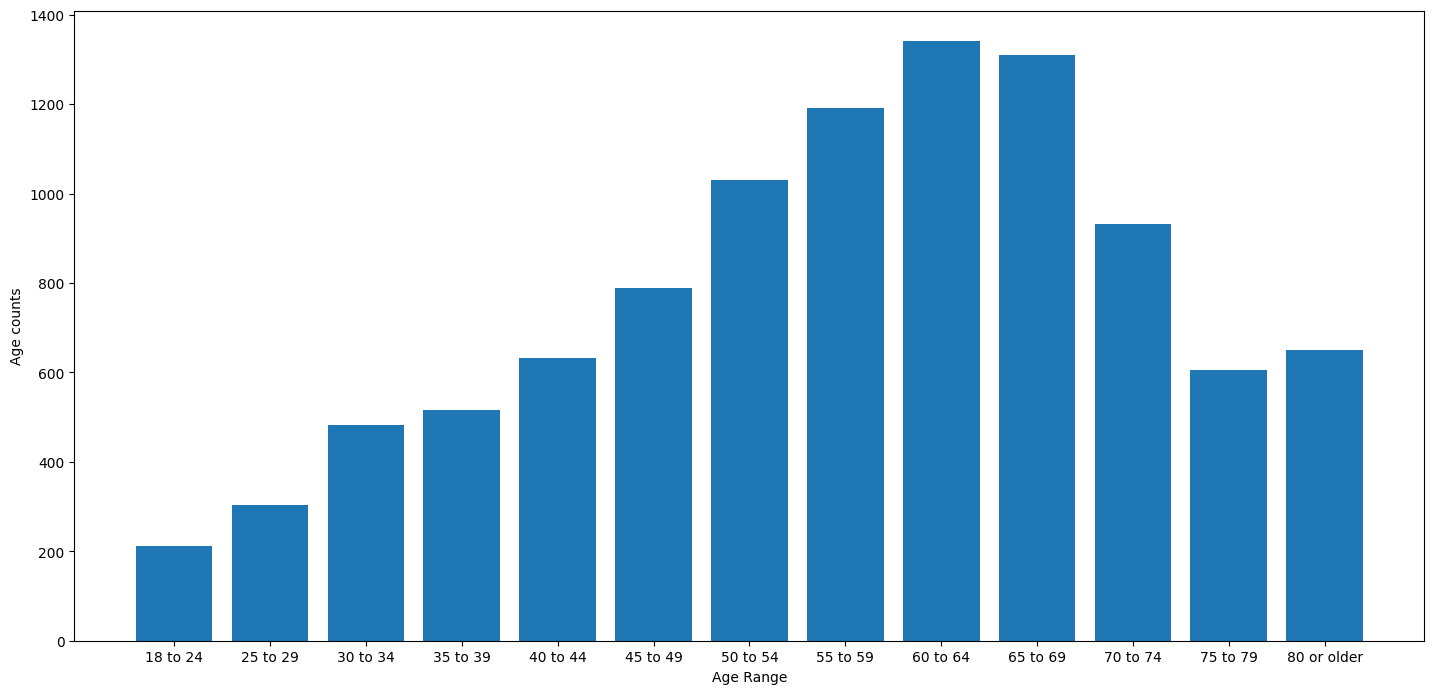

In [241]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.set_xlabel('Age Range')
age_axes.set_ylabel('Age counts')

age_axes.bar(age_count.index,age_count.values)

plt.show()

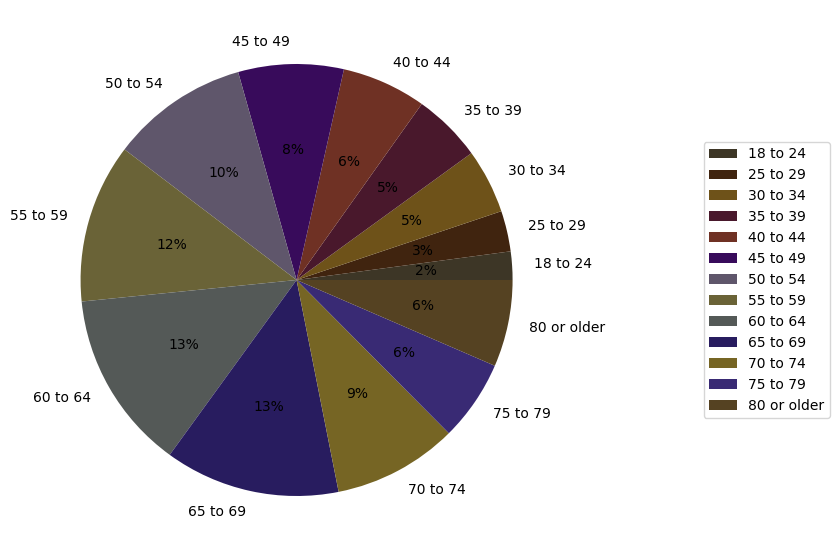

In [242]:
import random

age_figer=plt.figure(figsize=(10,6),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(age_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)

wedges, texts, autotexts=age_axes.pie(age_count.values,labels=age_count.index,
                                      colors=colors,autopct="%1.0f%%") #,textprops=dict(color="w")
plt.legend(wedges,age_count.index,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [243]:
age_diabetes_distribution =(
    diabetes_train_dataframe.groupby(by=["Age","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

age_diabetes_distribution

Diabetes_binary,Diabetic,Non-Diabetic
Age,,
18 to 24,7,205
25 to 29,13,291
30 to 34,15,468
35 to 39,25,492
40 to 44,36,596
45 to 49,85,703
50 to 54,119,912
55 to 59,155,1037
60 to 64,235,1107


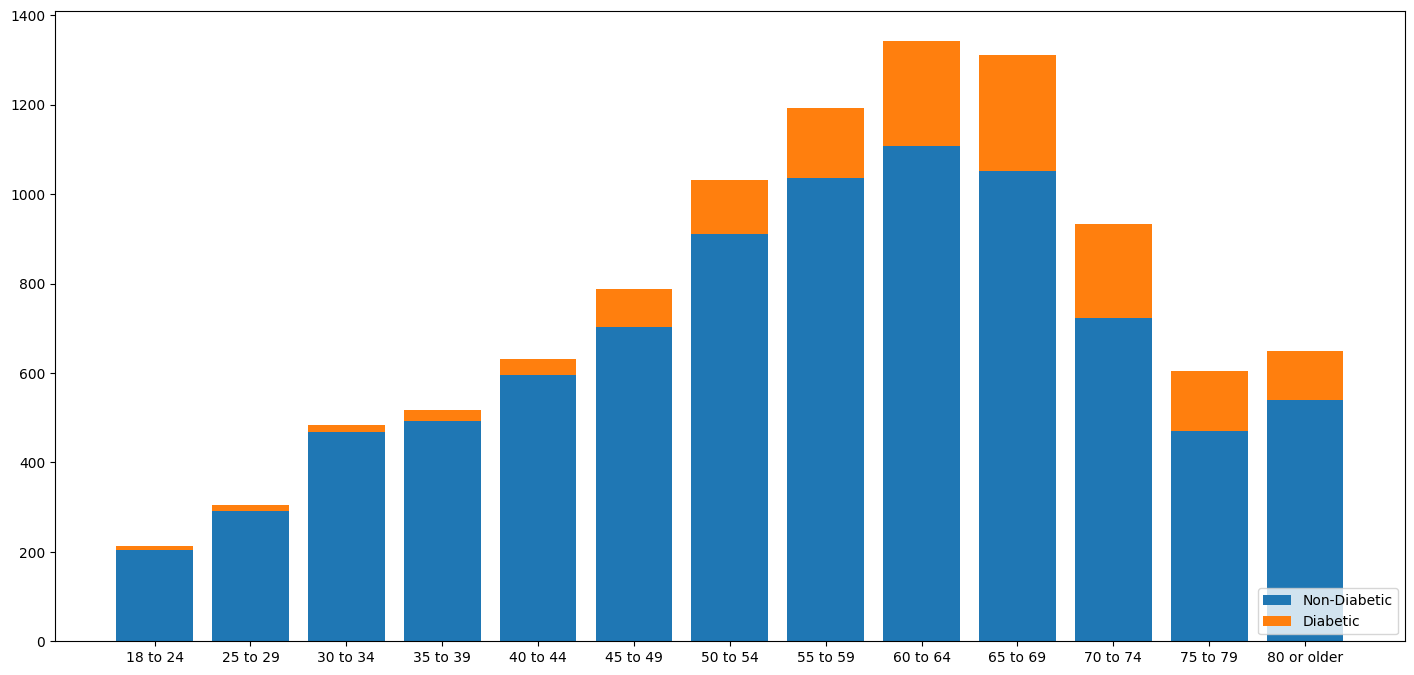

In [244]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.bar(age_diabetes_distribution .index,age_diabetes_distribution ["Non-Diabetic"],label="Non-Diabetic")
age_axes.bar(age_diabetes_distribution .index,age_diabetes_distribution ["Diabetic"],label="Diabetic",bottom=age_diabetes_distribution ["Non-Diabetic"])
plt.legend(loc="lower right")


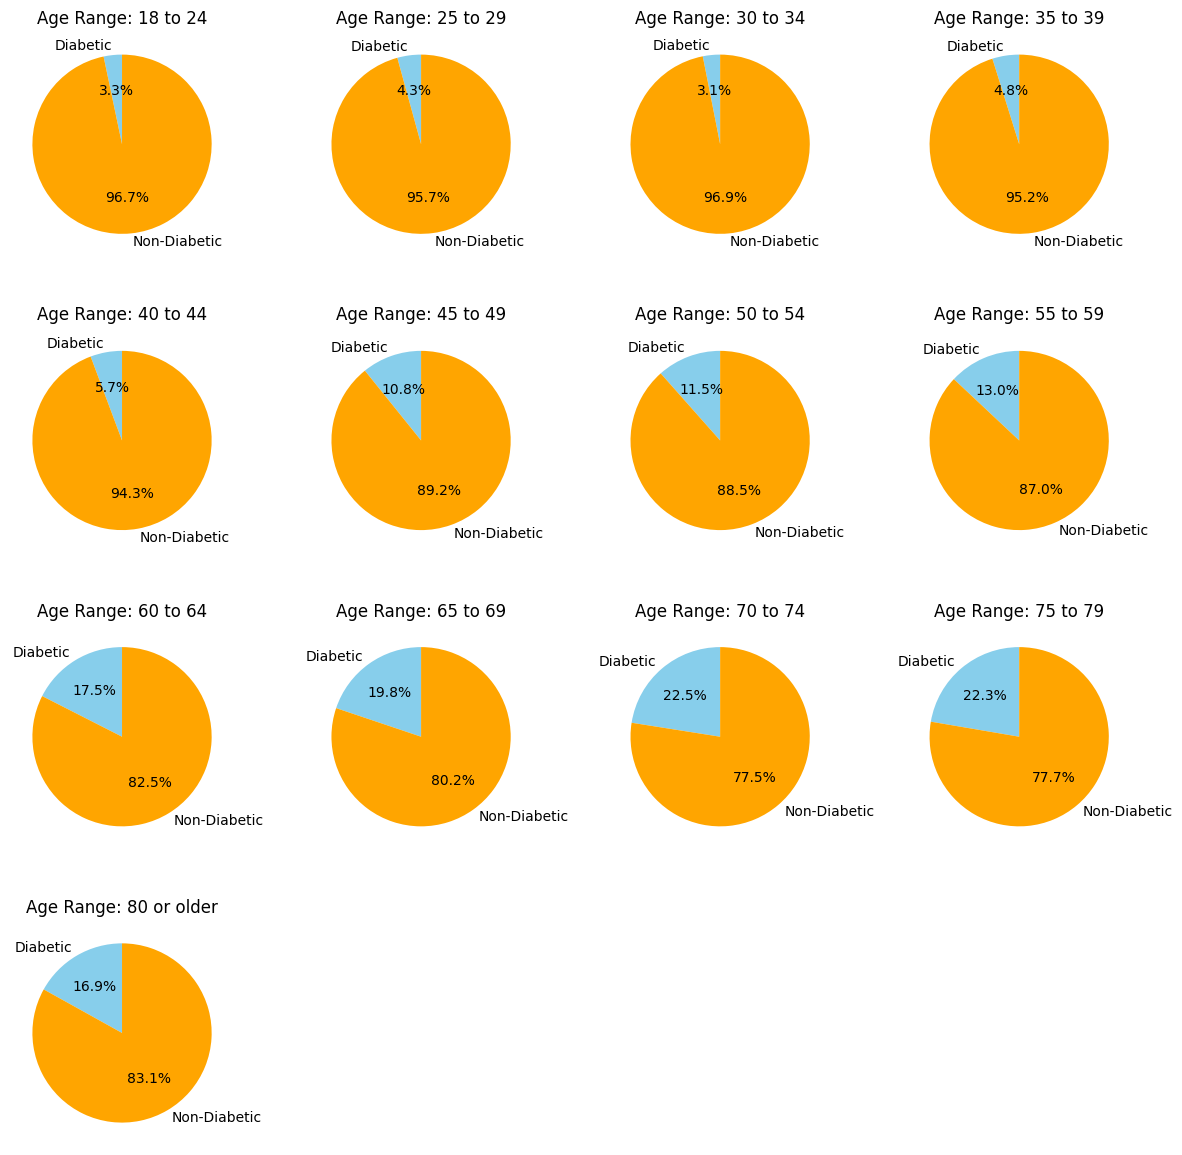

In [245]:
import math

age_diabetes_percentage = age_diabetes_distribution.div(age_diabetes_distribution.sum(axis=1), axis=0) * 100

num_age_ranges = len(age_diabetes_percentage)

rows = math.ceil(num_age_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, age_range in enumerate(age_diabetes_percentage.index):
    data = age_diabetes_percentage.loc[age_range]
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Age Range: {age_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Visualizing Education Data

In [246]:
diabetes_train_dataframe["Education"].describe()

count     10000
unique        6
top           6
freq       4263
Name: Education, dtype: object

In [247]:
education_count=diabetes_train_dataframe["Education"].value_counts().sort_values()
education_count

Education
Never Attended School       9
Elementary                150
High School               351
Some College Degree      2448
Advanced Degree          2779
6                        4263
Name: count, dtype: int64

<BarContainer object of 6 artists>

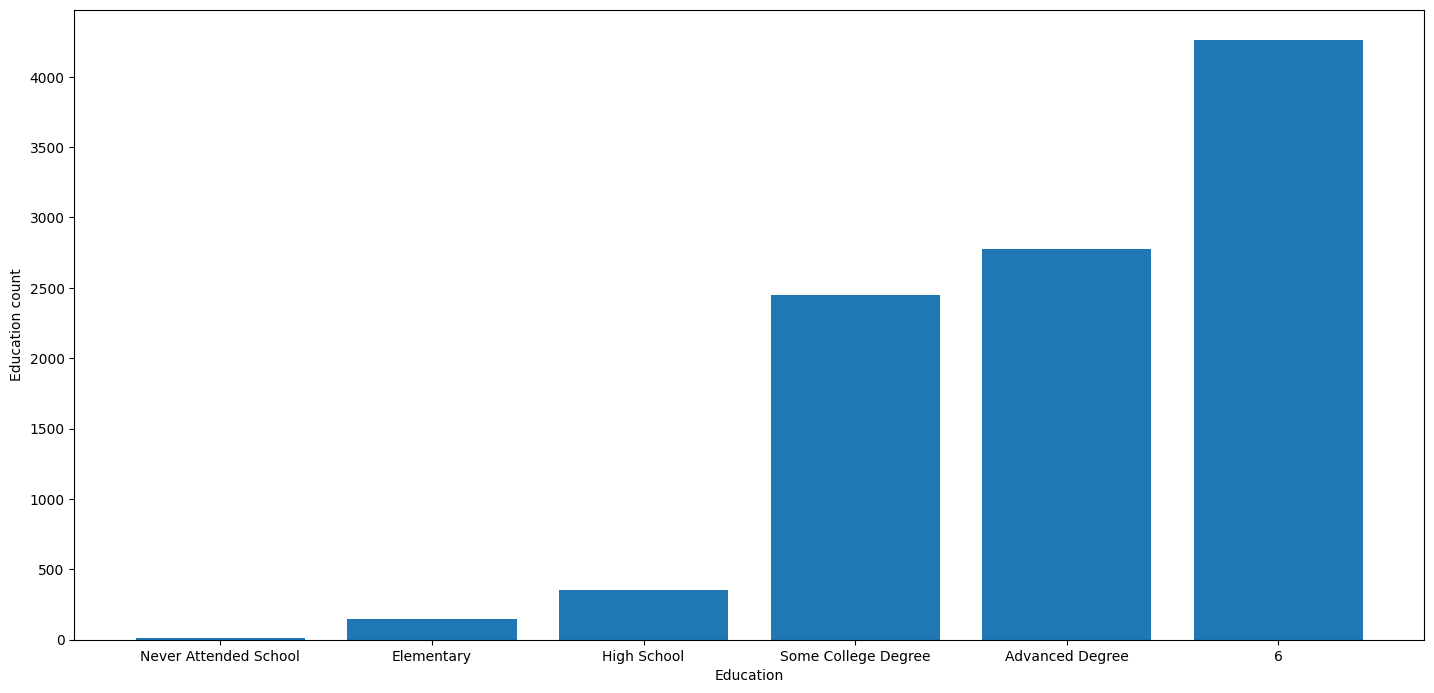

In [248]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.set_xlabel('Education')
education_axes.set_ylabel('Education count')

education_axes.bar(education_count.index,education_count.values)

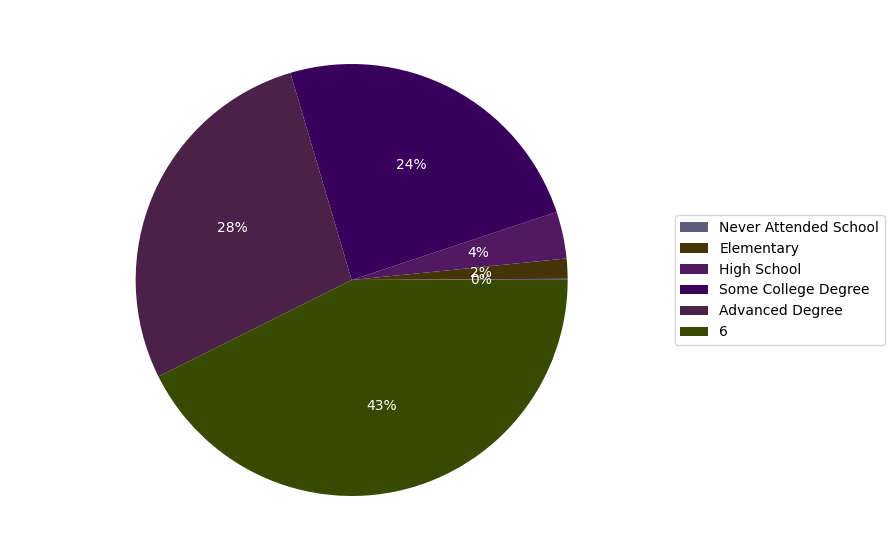

In [249]:
import random

education_figer=plt.figure(figsize=(20,6),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(education_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)


wedges, texts, autotexts=education_axes.pie(education_count.values,labels=education_count.index,
                                      colors=colors,autopct="%1.0f%%",textprops=dict(color="w"))
plt.legend(wedges,education_count.index,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [250]:
education_diabetes_distribution =(
    diabetes_train_dataframe.groupby(by=["Education","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

education_diabetes_distribution

Diabetes_binary,Diabetic,Non-Diabetic
Education,,
6,386,3877
Advanced Degree,453,2326
Elementary,39,111
High School,79,272
Never Attended School,2,7
Some College Degree,446,2002


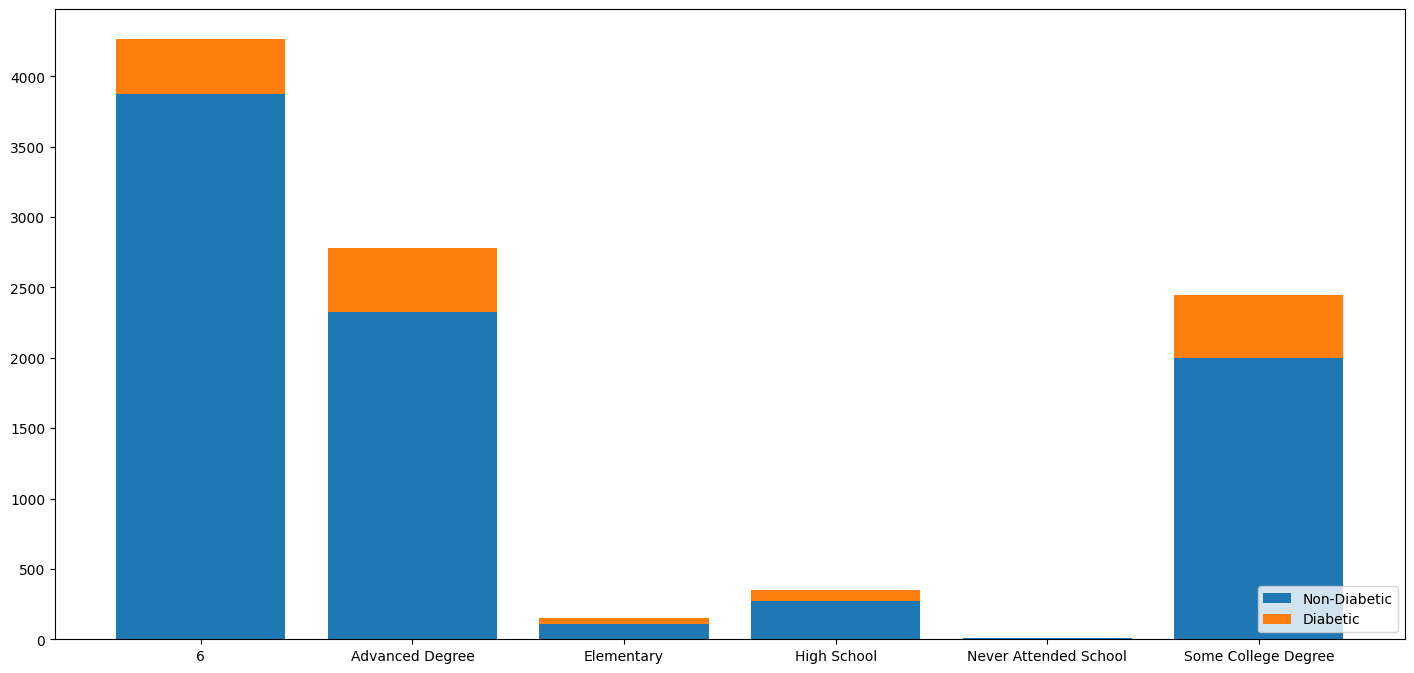

In [251]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.bar(education_diabetes_distribution .index,education_diabetes_distribution ["Non-Diabetic"],label="Non-Diabetic")
education_axes.bar(education_diabetes_distribution .index,education_diabetes_distribution ["Diabetic"],label="Diabetic",bottom=education_diabetes_distribution ["Non-Diabetic"])
plt.legend(loc="lower right")

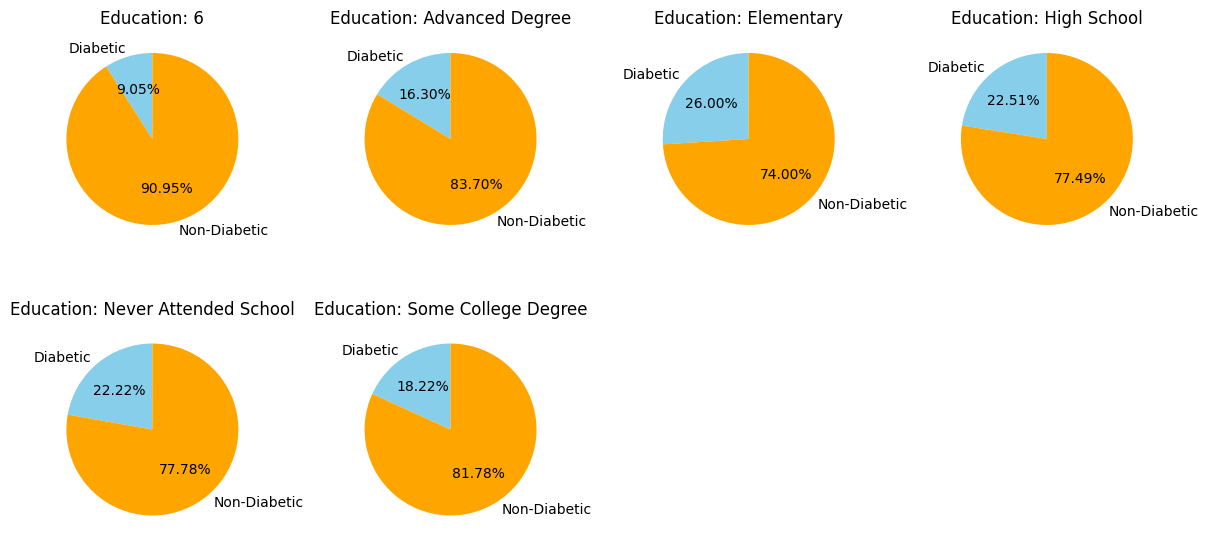

In [252]:
import math

education_diabetes_percentage = education_diabetes_distribution.div(education_diabetes_distribution.sum(axis=1), axis=0) * 100

num_education_ranges = len(education_diabetes_percentage)

rows = math.ceil(num_education_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, education_range in enumerate(education_diabetes_percentage.index):
    data = education_diabetes_percentage.loc[education_range]
    axes[i].pie(data, labels=data.index, autopct='%0.2f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Education: {education_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## visualizing General Health data 

selecting the colors

In [253]:
colors = ['#66b3ff', '#ff6666']

### 1.histograms

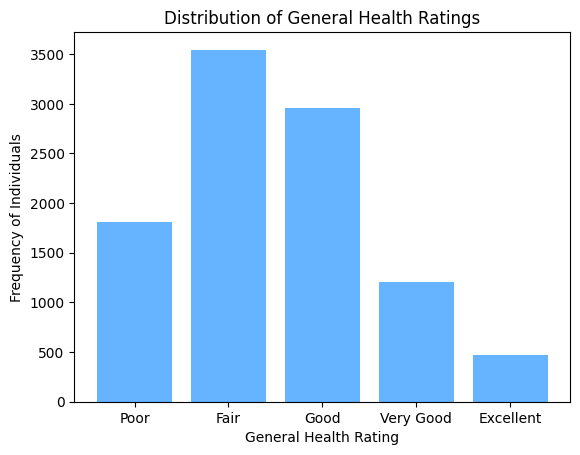

In [254]:
# Define the order of bins
ratings = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Calculate frequency and reindex
freq = diabetes_train_dataframe["GenHlth"].value_counts().reindex(ratings, fill_value=0)

# Use bar chart instead of histogram
plt.bar(freq.index, freq.values, color=colors[0])
plt.ylabel("Frequency of Individuals")
plt.xlabel("General Health Rating")
plt.title("Distribution of General Health Ratings")

plt.show()


### 2.bar chart

a bar chart that shows each general health rating with its number of occurances

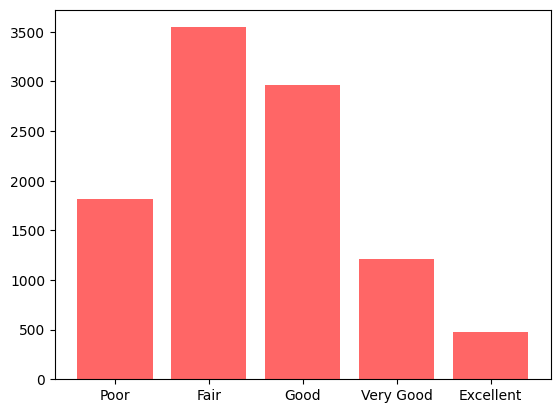

In [255]:
plt.bar(freq.index, freq.values, color=colors[1])
plt.show()

a bar chart that shows each rating with its occurances, splitted to *'Diabetic'* and *'Non-Diabetic'*

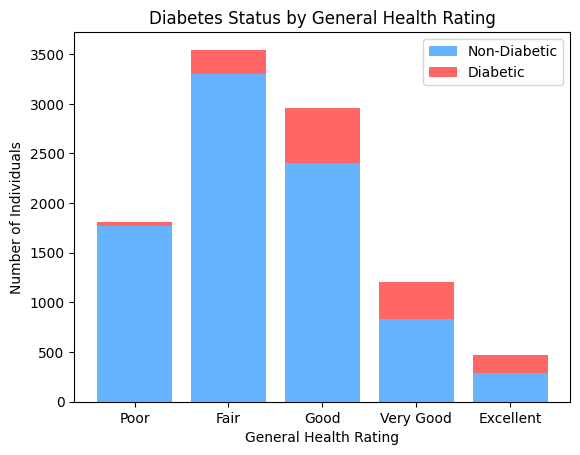

GenHlth    Diabetes_binary
Excellent  Diabetic            183
           Non-Diabetic        291
Fair       Diabetic            244
           Non-Diabetic       3301
Good       Diabetic            559
           Non-Diabetic       2400
Poor       Diabetic             43
           Non-Diabetic       1770
Very Good  Diabetic            376
           Non-Diabetic        833
dtype: int64

In [256]:
group_sizes = diabetes_train_dataframe.groupby(["GenHlth", "Diabetes_binary"]).size()

gen_hlth_diabetic= [int(group_sizes[i]["Diabetic"]) for i in freq.index]
gen_hlth_non_diabetic= [int(group_sizes[i]["Non-Diabetic"]) for i in freq.index]

plt.bar(freq.index, gen_hlth_non_diabetic, label='Non-Diabetic', color=colors[0])
plt.bar(freq.index, gen_hlth_diabetic, bottom=gen_hlth_non_diabetic, label='Diabetic', color=colors[1])

#adding labels and title
plt.xlabel('General Health Rating')
plt.ylabel('Number of Individuals')
plt.title('Diabetes Status by General Health Rating')
plt.legend() #to show labels in the upper right corner
plt.show()
group_sizes

### 3.pie chart
each pie chart visualizes the proportion of diabetic and non-diabetic individuals in each health category, with the percentage distribution shown on the chart.

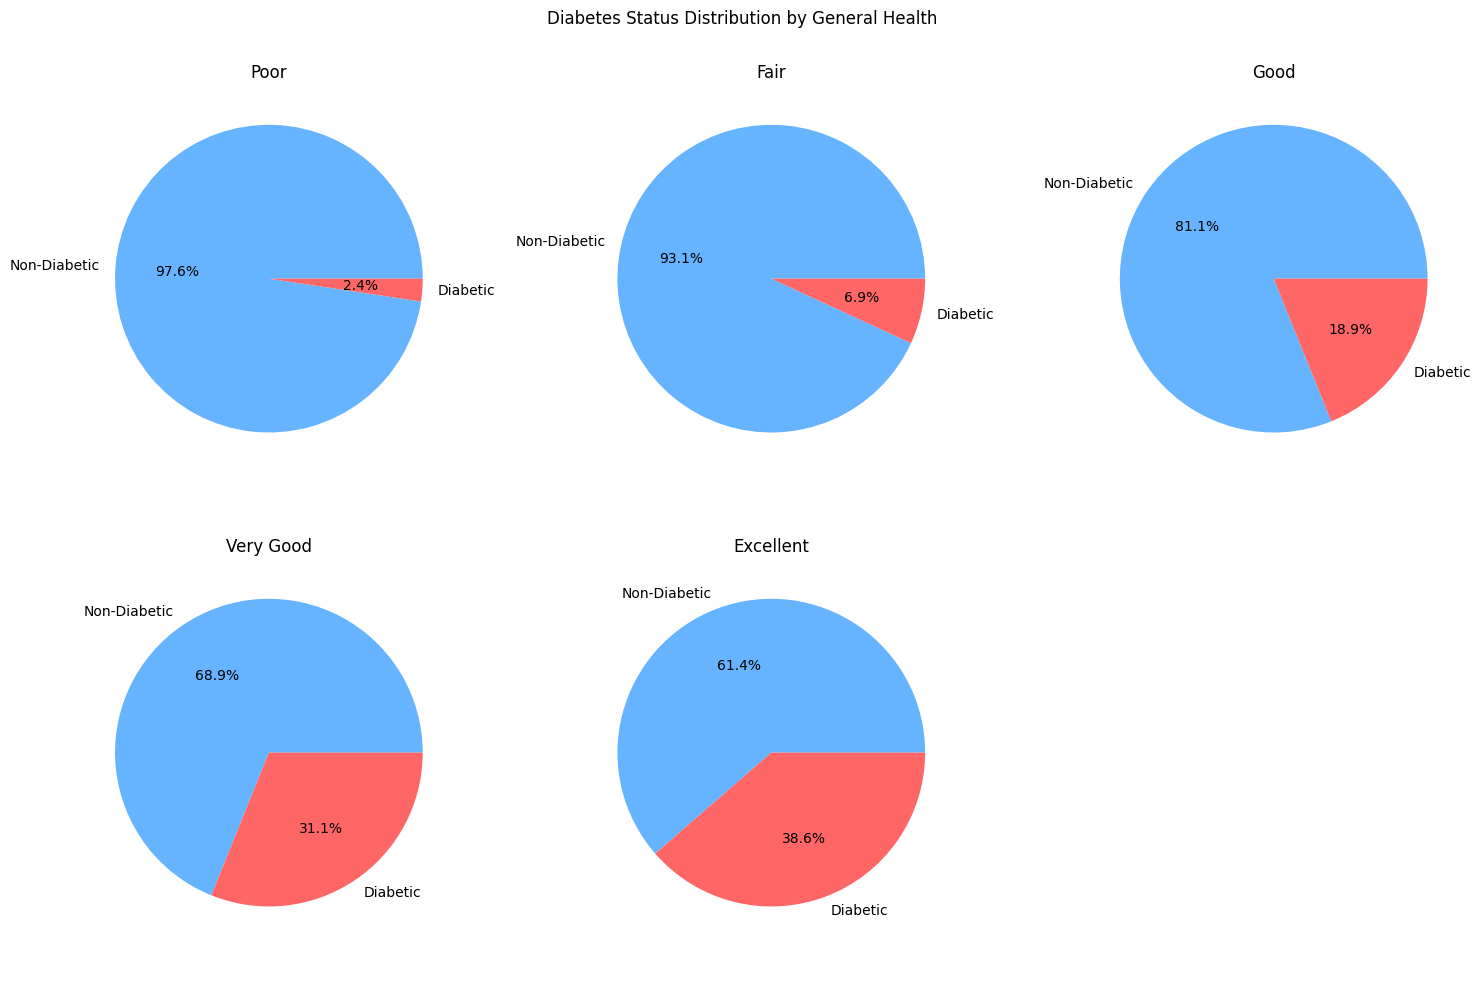

In [257]:
# Assuming you have the necessary data
num_plots = 5  # Number of pie charts to display
rows = 2  # Two rows
cols = 3  # Three columns

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array to easily index it
axes = axes.flatten()

for i, rating in enumerate(ratings):
    ax = axes[i]  # Select the subplot
    ax.pie([int(group_sizes[rating]["Non-Diabetic"]), int(group_sizes[rating]["Diabetic"])], 
           labels=["Non-Diabetic", "Diabetic"], autopct='%0.1f%%', colors=colors)
    ax.set_title(rating)  # Use the updated categories

# Hide empty subplots (if any)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

fig.suptitle("Diabetes Status Distribution by General Health")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Visualizing BMI Data

In [258]:
bmi_count=diabetes_train_dataframe["BMI"].value_counts().sort_index()

bmi_count

BMI
13.0     1
14.0     1
15.0     6
16.0    16
17.0    22
        ..
86.0     1
87.0     2
89.0     2
92.0     1
95.0     1
Name: count, Length: 69, dtype: int64

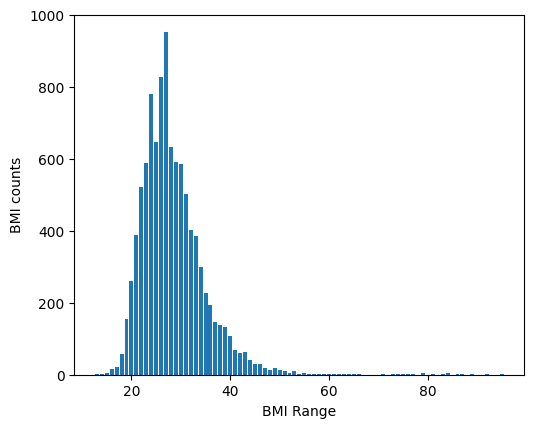

In [259]:
bmi_figer=plt.figure(figsize=(5,4),dpi=100)
bmi_axes=bmi_figer.add_axes([0.1,0.1,0.9,0.9])

bmi_axes.set_xlabel('BMI Range')
bmi_axes.set_ylabel('BMI counts')

bmi_axes.bar(bmi_count.index,bmi_count.values)

plt.show()

### Visualizing Veggies data
if the individual consumes veggies at least once per day 

In [260]:
diabetes_train_dataframe["Veggies"].value_counts()

Veggies
1    8142
0    1858
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_16816\2090304568.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nums = [grouped_by_veggies[0], grouped_by_veggies[1], grouped_by_veggies[2], grouped_by_veggies[3]]


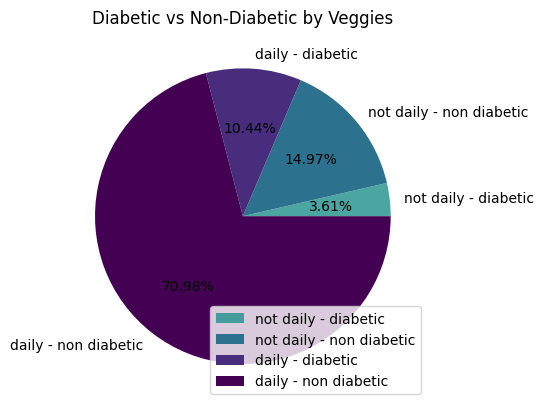

In [261]:
grouped_by_veggies = diabetes_train_dataframe.groupby(["Veggies", "Diabetes_binary"]).size()
labels = ["not daily - diabetic", "not daily - non diabetic", "daily - diabetic", "daily - non diabetic"]
nums = [grouped_by_veggies[0], grouped_by_veggies[1], grouped_by_veggies[2], grouped_by_veggies[3]]
plt.pie(nums, labels=labels, autopct='%0.2f%%', colors=["#21908CCF", "#2C728EFF", "#472D7BFF", "#440154FF"])
plt.legend()
plt.title("Diabetic vs Non-Diabetic by Veggies")
plt.show()

### Visualizing Fruits data
if the individual consumes fruit at least once per day 

In [262]:
diabetes_train_dataframe["Fruits"].value_counts()

Fruits
1    6316
0    3684
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_16816\1712299479.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nums = [grouped_by_fruits[0], grouped_by_fruits[1], grouped_by_fruits[2], grouped_by_fruits[3]]


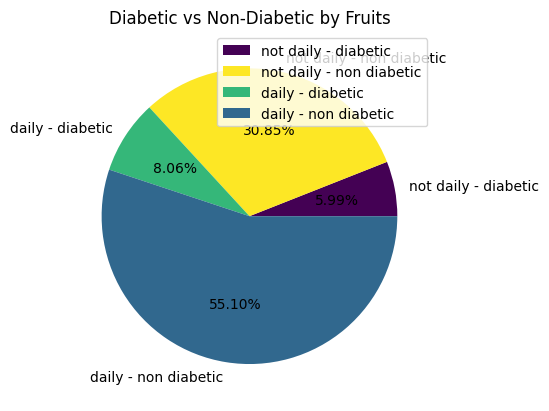

In [263]:
grouped_by_fruits = diabetes_train_dataframe.groupby(["Fruits", "Diabetes_binary"]).size().sort_index()
nums = [grouped_by_fruits[0], grouped_by_fruits[1], grouped_by_fruits[2], grouped_by_fruits[3]]
plt.pie(nums, labels = labels, autopct='%0.2f%%', colors=["#440154FF", "#FDE725FF", "#35B779FF", "#31688EFF"])
plt.legend()
plt.title("Diabetic vs Non-Diabetic by Fruits")
plt.show()


# ***Handling non-numeric Attributes***

## ordinal encoding : GenHlth
encoding the values of **GenHlth**, 
*'poor : 1, fair : 2, good : 3, very good : 4, Excellent : 5'*

In [264]:
from sklearn.preprocessing import OrdinalEncoder

# poor : 1, fair : 2, good : 3, very good : 4, Excellent : 5
categories_order = [['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']]
def general_health_ordinal_encoding(df) :
    ordinal_encoder = OrdinalEncoder(categories=categories_order)
    #fit GenHlth
    df[["GenHlth"]] = ordinal_encoder.fit_transform(df[["GenHlth"]])
    df["GenHlth"] = df["GenHlth"] + 1
    
    
general_health_ordinal_encoding(diabetes_train_dataframe)
general_health_ordinal_encoding(diabetes_test_dataframe)

diabetes_train_dataframe["GenHlth"].value_counts()

GenHlth
2.0    3545
3.0    2959
1.0    1813
4.0    1209
5.0     474
Name: count, dtype: int64

## Convert the age range to the average age

In [265]:
# Function get age_range like string the convert it to number 
def get_age_avg(age_range_string):
    age_range=age_range_string.split(" ")
    age_range.remove(age_range[1])
    if age_range[-1]=="older":
        age_range[-1]=100
    for idx in range(2):
        age_range[idx]=int(age_range[idx])
    
    return sum(age_range)/len(age_range)

In [266]:
diabetes_train_dataframe["AvgAge"]=diabetes_train_dataframe["Age"].apply(get_age_avg)
diabetes_test_dataframe["AvgAge"]=diabetes_test_dataframe["Age"].apply(get_age_avg)

diabetes_train_dataframe

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary,AvgAge
0,114414,29.0,0.0,65 to 69,0,1,1,0,0,0,...,1,1,1.0,0,0,0,6,7,Non-Diabetic,67.0
1,168896,32.0,0.0,80 or older,1,1,1,0,0,0,...,1,0,1.0,0,0,0,Some College Degree,4,Non-Diabetic,90.0
2,68354,25.0,5.0,65 to 69,1,0,1,1,0,0,...,1,0,2.0,0,0,1,6,2,Non-Diabetic,67.0
3,121194,24.0,0.0,80 or older,1,0,1,0,0,0,...,1,0,4.0,0,1,0,Advanced Degree,5,Non-Diabetic,90.0
4,141150,31.0,0.0,25 to 29,0,0,1,0,0,1,...,1,0,4.0,5,0,0,6,6,Diabetic,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55340,29.0,10.0,75 to 79,1,1,1,1,0,0,...,1,0,4.0,0,1,1,Some College Degree,3,Diabetic,77.0
9996,198525,29.0,0.0,55 to 59,1,1,1,0,0,0,...,1,1,3.0,30,0,1,6,8,Non-Diabetic,57.0
9997,13972,36.0,30.0,80 or older,1,1,1,1,0,0,...,1,0,4.0,0,1,0,Some College Degree,2,Diabetic,90.0
9998,216078,45.0,14.0,60 to 64,0,1,1,0,0,0,...,1,0,3.0,0,1,0,6,7,Non-Diabetic,62.0


## Converting Columns Types

### converting labels **"Diabetes_binary"** into **int**
if **'Non-Diabetic'** -> **0**, if **'Diabetic'** -> **1**

In [267]:
diabetes_train_dataframe["Diabetes_binary"] = diabetes_train_dataframe["Diabetes_binary"].apply(lambda x: 0 if x == "Non-Diabetic" else 1)
diabetes_test_dataframe["Diabetes_binary"] = diabetes_test_dataframe["Diabetes_binary"].apply(lambda x: 0 if x == "Non-Diabetic" else 1)

### converting the types of other columns into **int**

In [268]:
columns_names=["Sex","HighBP","CholCheck","Smoker",
              "HeartDiseaseorAttack","NoDocbcCost","MentHlth",
              "DiffWalk","Income","PhysActivity","Fruits",
              "Veggies","HvyAlcoholConsump","AnyHealthcare",
              "NoDocbcCost","HighChol","Stroke"
              ]
for name in columns_names:
    diabetes_train_dataframe[name]=diabetes_train_dataframe[name].astype(int)
    diabetes_test_dataframe[name] = diabetes_test_dataframe[name].astype(int)

diabetes_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10000 non-null  int64  
 1   BMI                   10000 non-null  float32
 2   PhysHlth              10000 non-null  float32
 3   Age                   10000 non-null  object 
 4   HighBP                10000 non-null  int64  
 5   HighChol              10000 non-null  int64  
 6   CholCheck             10000 non-null  int64  
 7   Smoker                10000 non-null  int64  
 8   Stroke                10000 non-null  int64  
 9   HeartDiseaseorAttack  10000 non-null  int64  
 10  PhysActivity          10000 non-null  int64  
 11  Fruits                10000 non-null  int64  
 12  Veggies               10000 non-null  int64  
 13  HvyAlcoholConsump     10000 non-null  int64  
 14  AnyHealthcare         10000 non-null  int64  
 15  NoDocbcCost         